##  CMSC 691: Homework 2

In this homework you will be working on clustering and try analyzing the data using various clustering algos from the scikit learn module.

You may use the Clusetring Jupyter Notebook Dr. Kalpakis prepared for the class.

### DataSet: 'Diabetic Data' 

This dataset represents 10 years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. It includes over 50 features representing patient and hospital outcomes. Information was extracted from the database for encounters that satisfied the following criteria.
1.	It is an inpatient encounter (a hospital admission).
2.	It is a diabetic encounter, that is, one during which any kind of diabetes was entered to the system as a diagnosis.
3.	The length of stay was at least 1 day and at most 14 days.
4.	Laboratory tests were performed during the encounter.
5.	Medications were administered during the encounter.
The data contains such attributes as patient number, race, gender, age, admission type, time in hospital, medical specialty of admitting physician, number of lab test performed, HbA1c test result, diagnosis, number of medication, diabetic medications, number of outpatient, inpatient, and emergency visits in the year before the hospitalization, etc.

https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008

In [1]:
#Malik Jackson
import pandas
import pandas as pd
import numpy as npd
df = pd.read_csv('diabetic_data.csv')
#Please run this module first.
#NOTE, for certain graphs, if plot view is too zoomed in or offcenter,
#you may want to manually expand the matplotlib window size to see the full plot of data, 
#defaults get set kind of wonkily in this jupyter notebook

In [2]:
df = pd.read_csv('diabetic_data.csv')
print(df[0:550])

     encounter_id  patient_nbr             race  gender       age weight  \
0         2278392      8222157        Caucasian  Female    [0-10)      ?   
1          149190     55629189        Caucasian  Female   [10-20)      ?   
2           64410     86047875  AfricanAmerican  Female   [20-30)      ?   
3          500364     82442376        Caucasian    Male   [30-40)      ?   
4           16680     42519267        Caucasian    Male   [40-50)      ?   
5           35754     82637451        Caucasian    Male   [50-60)      ?   
6           55842     84259809        Caucasian    Male   [60-70)      ?   
7           63768    114882984        Caucasian    Male   [70-80)      ?   
8           12522     48330783        Caucasian  Female   [80-90)      ?   
9           15738     63555939        Caucasian  Female  [90-100)      ?   
10          28236     89869032  AfricanAmerican  Female   [40-50)      ?   
11          36900     77391171  AfricanAmerican    Male   [60-70)      ?   
12          

### Q1. K-Means (10 pts):

Use the k-means clustering algo from sklearn.
Cluster the data over any numeric attribute by varying any 2 combinations of parameters of the KMeans algorithm 
and discuss the results obtained

Documentation:
http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

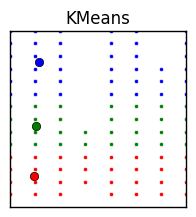

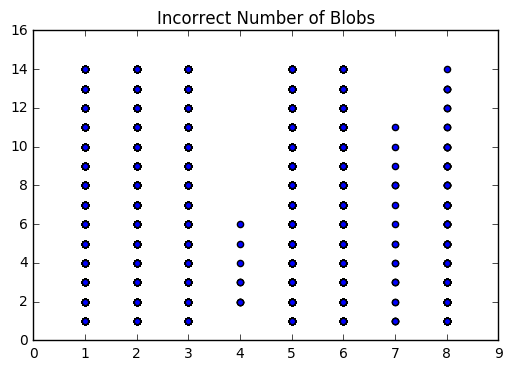

In [3]:
#Adapted from 
#http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html#sphx-glr-auto-examples-cluster-plot-kmeans-assumptions-py
#http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
import pandas
import pandas as pd
import numpy as npd
df = pd.read_csv('diabetic_data.csv')
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.metrics.pairwise import pairwise_distances_argmin


# Instead of ploting it twice  [or n times] ( which matplotlib messes up, I just commented out some interesting cases to try on two variables)
fig = plt.figure(figsize=(5,5))
numCls = 3
maxit = 3  #300  #1 #1000
init = 1 #5 #10 #100

data = []

colors = ['r','g','b']
#We'll start by sting the intersection of the admission type id and the time in hospital.
#With this example we'll want to see if we can draw any conclusion on the time a patient stays in a hospital based
#on the reason/type for their admission, which intuitively we should see patterns for. 

for a, b in zip( df.admission_type_id , df.time_in_hospital):
    temp = [int(a),int(b)]
    data.append(temp)

X = np.array(data)

clusts = KMeans(n_clusters=numCls, n_init=init,max_iter=maxit).fit(X)
clusts_cluster_centers = np.sort(clusts.cluster_centers_, axis=0)
clusts_labels = pairwise_distances_argmin(X, clusts_cluster_centers)


ax = fig.add_subplot(222)
for k, col in zip(range(numCls), colors):
    my_members = clusts_labels == k
    cluster_center = clusts_cluster_centers[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w',
            markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=6)
ax.set_title('KMeans')
ax.set_xticks(())
ax.set_yticks(())

plt.show()

#we see that no matter how we tweak the number of iterations we converge our cluster or the initialization of our cluster,
#the centers and clusters of our data stays pretty constitent. Looking back at our data to see how it matches up with this
#however, we see a large variancy between our time in hospital and our admission type id, so we may not have any strong
#conclusions to gain , though we do see that our clusters are fairly well partitioned and stacked on top of each other, 
#meaning our y value as a strong influence on where the data will be placed in the cluster.


#We'll plot the data without the cluster for comparason. Just the data getting plotted
plt.scatter(X[:, 0], X[:, 1])
plt.title("Incorrect Number of Blobs")
plt.show()


## Q2. Use the k-medoids clustering algorithm (30 pts):

k-medoids is a special case of k-means where the centroids are chosen from among the data points in the dataset.

Using k-medoids, create 2 different clusters of the above dataset.
1. Clustering over some numeric attributes of your choice.
2. Clustering over some nominal and numerical attributes of your choice.



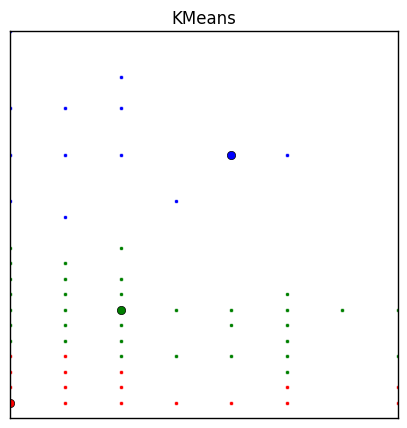

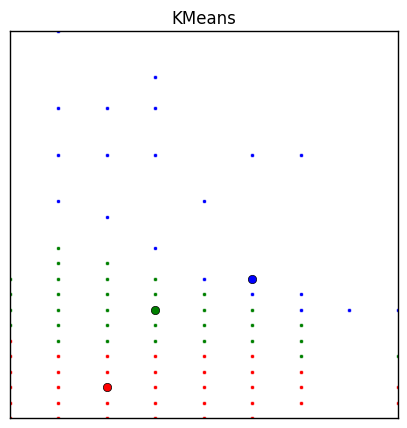

In [53]:
#Adapted from 
#https://www.researchgate.net/publication/272351873_NumPy_SciPy_Recipes_for_Data_Science_k-Medoids_Clustering

#NOTE, originally, I attempted to adapt a proper, professional implementatoion of k-medoids, but scikit learn did not
#comntain one natively and every version I looked up online resulted in an  index error (which you can see for yourself with
#the one I embedded in the code. In the end, I ended up using my own, homemade interprestaion of k-medioids)

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from itertools import cycle, islice
from sklearn.cluster import KMeans
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.metrics.pairwise import pairwise_distances_argmin
from scipy.cluster import hierarchy
import pandas
import pandas as pd
import numpy as npd
df = pd.read_csv('diabetic_data.csv')

#This isthe code I tried to adapt, not actually utilized ~~~~~~
def kMedoids(D, k, tmax=100):
    # determine dimensions of distance matrix D
    m, n = D.shape
    
    # randomly initialize an array of k medoid indices
    M = np.sort(np.random.choice(n, k))
    
    # create a copy of the array of medoid indices
    Mnew = np.copy(M)

    # initialize a dictionary to represent clusters
    C = {}

    for t in range(tmax):
        # determine clusters, i.e. arrays of data indices
        J = np.argmin(D[:,M], axis=1)
        for kappa in range(k):
            C[kappa] = np.where(J==kappa)[0]
        # update cluster medoids
        for kappa in range(k):
            J = np.mean(D[np.ix_(C[kappa],C[kappa])],axis=1)
            j = np.argmin(J)
            Mnew[kappa] = C[kappa][j]
        np.sort(Mnew)
 
        # check for convergence
        if np.array_equal(M, Mnew):
            break
    
        M = np.copy(Mnew)

    else:
        # final update of cluster memberships
        J = np.argmin(D[:,M], axis=1)
        for kappa in range(k):
            C[kappa] = np.where(J==kappa)[0]
 
 
    # return results
    return M, C

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
data = []

#Lets attempt to use k-medioids to study relationships betwoon admission type and source and age and race.

#naturally numeric attributes shall be df.admission_type_id and df.admission_source_id
#Naturally nominal attributes shall be age rage and race
df["age"] = df["age"].astype('category').cat.codes
df["race"] = df["race"].astype('category').cat.codes

for a, b in zip( df.admission_type_id , df.admission_source_id): 
    temp = [int(a),int(b)]
    data.append(temp)
sample = data

X = np.array(sample)


#M,C =  kMedoids(X,2)# Attempt to call sparate function thatfails with index error, comment to try for yourself 


clusts = KMeans(n_clusters=3, n_init=4,).fit(X)
clusts_cluster_centers = np.sort(clusts.cluster_centers_, axis=0)
new_ctrs = []

for a in clusts_cluster_centers:
    temp1 = min(df.admission_type_id, key=lambda x:abs(x-a[0]))
    temp2 = min(df.admission_source_id, key=lambda x:abs(x-a[1]))
    new_ctrs.append([int(temp1),int(temp2)])

new_centers = np.array(new_ctrs)
colors = ['r','g','b']
clusts_labels = pairwise_distances_argmin(X,new_centers)

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
for k, col in zip(range(3), colors):
    my_members = clusts_labels == k
    cluster_center = new_centers[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w',
            markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=6)
ax.set_title('k medoids ')
ax.set_xticks(())
ax.set_yticks(())
plt.show()





for a, b in zip( df.race , df.age): 
    temp = [int(a),int(b)]
    data.append(temp)
sample = data

X = np.array(sample)

#M,C =  kMedoids(X,1) Attempt to call sparate function thatfails with index error


clusts = KMeans(n_clusters=3, n_init=4,).fit(X)
clusts_cluster_centers = np.sort(clusts.cluster_centers_, axis=0)
new_ctrs = []

for a in clusts_cluster_centers:
    temp1 = min(df.race, key=lambda x:abs(x-a[0]))
    temp2 = min(df.age, key=lambda x:abs(x-a[1]))
    new_ctrs.append([int(temp1),int(temp2)])

#print(new_ctrs)
new_centers = np.array(new_ctrs)
colors = ['r','g','b']
clusts_labels = pairwise_distances_argmin(X,new_centers)

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
for k, col in zip(range(3), colors):
    my_members = clusts_labels == k
    cluster_center = new_centers[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w',
            markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=6)
ax.set_title('k medoids ')
ax.set_xticks(())
ax.set_yticks(())
plt.show()



#We observe a fairly segregated set of clusters in both of the data sets, meaning that race and age might be related and 
#admission type and source might be related in both graphs, the y axis is a major determinant or what cluster the data gets 
#clustered into. 


## Q3 Agglomerative (10 pts)

Use agglomerative clustering to demonstrate hierarchical (agglomerative) clustering of the dataset. Plot a dendrogram for your clustering.

{0, 1, 2, 3, 4, 5}
{'Asian', 'Hispanic', 'AfricanAmerican', '?', 'Caucasian', 'Other'}


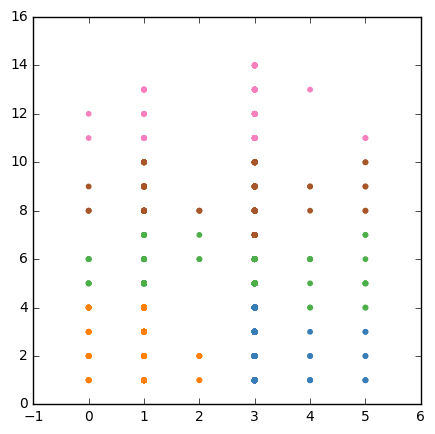

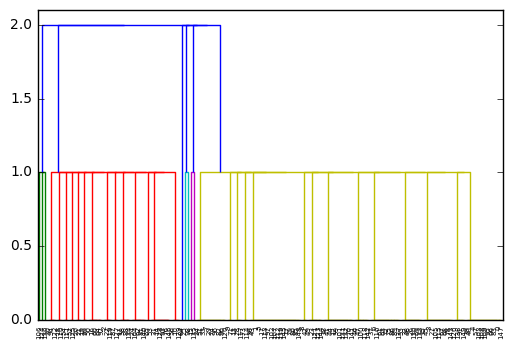

In [13]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from itertools import cycle, islice
from sklearn.cluster import KMeans
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.metrics.pairwise import pairwise_distances_argmin
from scipy.cluster import hierarchy
import pandas
import pandas as pd
import numpy as npd
df = pd.read_csv('diabetic_data.csv')

fig = plt.figure(figsize=(5, 5))

random_state = 170
numCls = 3

data = []
#our cat codes aren't directly matching, which is s aslight hinderance in 
#which prevents us from identitfing groups directly, but doesn't prevent us from analyzing clusters themselves.
print(set( df.race.astype('category').cat.codes))
print(set( df.race.astype('category').cat.categories))

df["race"] = df["race"].astype('category').cat.codes


#Let's now take a look at the 
for a, b in zip( df.race , df.time_in_hospital):
    temp = [int(a),int(b)]
    data.append(temp)
sample = data[0:1500]

X = np.array(sample)

clusts = AgglomerativeClustering(n_clusters = 5).fit(X) # try 3, 4, 5

lbls = clusts.labels_.astype(np.int)
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(lbls) + 1))))

plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[lbls])

plt.show()

sample2 = data[0:150] #try 15, 150, 500

X2 = np.array(sample2)

dplt = hierarchy.linkage(X2, 'single')
result = hierarchy.dendrogram(dplt)
plt.figure()
plt.show()
#Interesting!! Both the Dendogram and the clusterplot show a y correlation to cluster, meaning that we may want to 
#dig on additional information to search for further proof/reason of a correlation between race and time in hospital.
#Are certain races statistically more likely to stay in hospitals and if so, what's the reason? Our next step would be to
#study further potiential areas of correlations such as admission source and type as they correlate to race.

## Q4 Spectral Clustering (10 pts)

Perform spectral clustering on attributes of your choice.

4


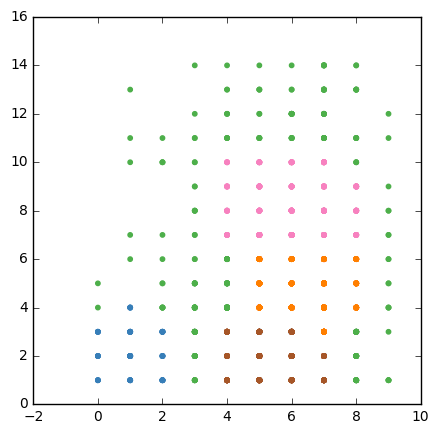

In [55]:
#Code adapted from http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from itertools import cycle, islice
import pandas
import pandas as pd
import numpy as npd
df = pd.read_csv('diabetic_data.csv')
fig = plt.figure(figsize=(5, 5))


random_state = 170
numCls = 3

data = []
df["age"] = df["age"].astype('category').cat.codes

#Continuing on our correlations, lets see if age [or more specifically, age group ] and time and hospital 
#has any interesting relationships or correlations. One might think, older people have more serious injuries when 
#visiting the hospital, but let's take a closer look.

for a, b in zip( df.age , df.time_in_hospital):
    temp = [int(a),int(b)]
    data.append(temp)
sample = data[0:1500]

X = np.array(sample)
clusts = SpectralClustering(n_clusters = 5).fit(X) #Try also 8, 3 and 4 for n_clusters

lbls = clusts.labels_.astype(np.int)

colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']), int(max(lbls) + 1)  )))

plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[lbls])

ax.set_title('SpectralClustering')
ax.set_xticks(())
ax.set_yticks(())

plt.show()
#Using spectral clustering, we consistently get a more spread out set of clusters instead of a more uniform group in part 1.
#This could mean that our features are not very closely related and there there is no major signficant correlation between 
#our features: age group and time in hospital.


## Q5 Plotting clusters and discussion of results (40 pts)

Using tools from the matplot, seaborn, and pandas packages, illustrate the generated clusters for each of the clustering methods used above and discuss the results.

In [ ]:
#This step has already been performed for each of the corresponding questions above! Check/run each Clustering method for 
#a graphical view and a discussion of results
